In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!curl https://course-v3.fast.ai/setup/colab | bash

from fastai import *
from fastai.vision import *
import numpy as np
import matplotlib.pyplot as plt
import os

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   287  100   287    0     0     50      0  0:00:05  0:00:05 --:--:--    91
bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">'
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
#path to test images folder:
pathFolders = Path('/content/drive/My Drive/HackathonProject/TestFolders')
path_test = '/content/drive/My Drive/HackathonProject/TestFolders/02-14'
#check subfolders:
subFolders = os.listdir(path_test)
nr_folders = len(subFolders)
print(nr_folders)

19


In [0]:
def getPercentViolent(folderName):
  """function to return the percent peaceful photos in a batch of images using the trained classifier created with resnet50"""
  
  #path to the classifier:
  classPath = Path('/content/drive/My Drive/HackathonProject/training_set/')
  #path to the folder with the images:
  pathFiles = Path('/content/drive/My Drive/HackathonProject/TestFolders/02-13/'+ folderName + '/')
  #load the classifier into learn:
  learn = load_learner(classPath, test=ImageList.from_folder(pathFiles))
  print(pathFiles)
  print(os.listdir(pathFiles))
  
  #get predictions for all the images in the folder
  preds,y = learn.get_preds(ds_type=DatasetType.Test)
  #for debug purposes:
  #print(preds)
  #turn predictions into binary decision: 1 = peaceful, 0 = violent
  predictions = preds[:,0]
  #predictions = predictions.eval()
  predictions = list(predictions)
  #print(predictions)
  x = []
  for i in predictions:
    
    if i>.5: 
      #print('Peaceful')
      x.append(1)
    else: 
      #print('Violent')
      x.append(0)
  
  return sum(x)/len(x)
  

I need to keep the folders in order, so I am working off a list of filenames instead of just reading the output of my os.listdir() function.

In [11]:
fName = ['00', '01','02', '03','04', '05','06', '07','08', '09','10', '11', '12', '13','14', '15', '16', '17','18', '19', '20', '21', '22', '23' ]
timeLine = []
for i in range(nr_folders):
  p = getPercentViolent(fName[i])
  print(p)
  timeLine.append(p)

0.875


Plotting the change in percentage of peaceful images tweeted over the hours of a day:
    

Text(0.5, 1.0, '02-14')

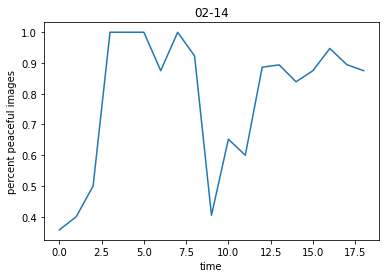

In [13]:
plt.plot(timeLine)
plt.xlabel('time')
plt.ylabel('percent peaceful images')
plt.title('02-14')

Since I can plot data hourly for each day, here is another day plotted:

In [14]:
path_test = '/content/drive/My Drive/HackathonProject/TestFolders/02-13'
#check subfolders:
subFolders = os.listdir(path_test)
nr_folders = len(subFolders)
print(nr_folders)

24


In [17]:
timeLine = []
for i in range(nr_folders):
  p = getPercentViolent(fName[i])
  print(p)
  timeLine.append(p)

0.75


Text(0.5, 1.0, '02-13')

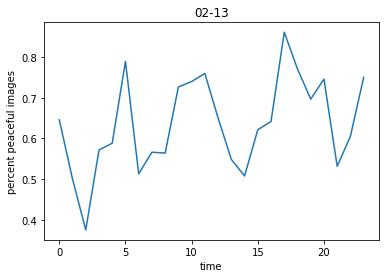

In [18]:
plt.plot(timeLine)
plt.xlabel('time')
plt.ylabel('percent peaceful images')
plt.title('02-13')